# 1. The Data Wrangling Workshop: Activity 7.01, page 388

In [114]:
# import libraries
import urllib.request, urllib.parse, urllib.error
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [115]:
# read the html from the url
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [116]:
# function to check the status of the web request
def web_page_status(r):
    if r.status_code==200:
        print("Request Successful!")
        return 1
    else:
        print("Request Failed!")
        return -1

In [117]:
# running function
web_page_status(response)

Request Successful!


1

In [118]:
# contents is the html page
contents = response.content.decode(response.encoding)
# soup is the parsed html page
soup = BeautifulSoup(contents, 'html.parser')

In [119]:
# Empty list to hold all the http links in the HTML page
links=[]
# Find all the href tags and store them in the list of links using  for loop
for link in soup.find_all('a'):
    #print(link.get('href'))
   links.append(link.get('href'))

In [120]:
# reviewing the first 30 links
links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [121]:
# reviewing how many links are in the list 
len(links)

675

In [122]:
# creating an empty list for the books 
booknum=[]

# using a regular expression to find the numeric digits in the links using a for loop
for i in range(33,133):
    link=links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [123]:
# reviewing the length of the booknum list
len(booknum)

100

In [124]:
# printing the list
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[84, 1513, 1342, 2701, 145, 2641, 100, 37106, 67979, 16389, 6761, 394, 2160, 4085, 6593, 11, 1259, 5197, 64317, 844, 174, 98, 345, 2542, 73637, 5200, 2554, 1400, 43, 28054, 25344, 2000, 1952, 1661, 76, 1727, 73636, 2591, 1260, 20228, 1080, 5740, 46, 6130, 4300, 2600, 219, 1184, 27827, 73631, 768, 996, 1998, 1232, 36, 55, 35899, 74, 30254, 2680, 23, 514, 2814, 120, 45, 244, 2852, 408, 16, 67098, 3207, 3825, 135, 8800, 1250, 16328, 10676, 600, 4363, 25717, 57634, 47629, 73630, 158, 1497, 205, 1399, 730, 8492, 5827, 58585, 73633, 31284, 73638, 10007, 161, 14859, 41445, 33283, 7370]


In [125]:
# using the .text method to print out the text from the word soup; first character to the 2000th
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-05-16376253
last 7 days3549510
last 30 days13546936



Top 100 EBooks yesterday


In [126]:
# creating the satrting title by index
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [127]:
# reviewing value of start_idx
start_idx

113

In [128]:
# Temp empty list of Ebook names
lst_titles_temp=[]
# running a for loop over the 100 numeric values of the contents of the soup object while using .text and .splitlines to separate the text
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+10+i])

In [129]:
# reviewing the contents of the temporary list
lst_titles_temp

['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2595)',
 'Romeo and Juliet by William Shakespeare (2457)',
 'Pride and Prejudice by Jane Austen (2417)',
 'Moby Dick; Or, The Whale by Herman Melville (2370)',
 'Middlemarch by George Eliot (1815)',
 'A Room with a View by E. M.  Forster (1775)',
 'The Complete Works of William Shakespeare by William Shakespeare (1709)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1654)',
 'The Blue Castle: a novel by L. M.  Montgomery (1540)',
 'The Enchanted April by Elizabeth Von Arnim (1525)',
 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1463)',
 'Cranford by Elizabeth Cleghorn Gaskell (1452)',
 'The Expedition of Humphry Clinker by T.  Smollett (1417)',
 'The Adventures of Roderick Random by T.  Smollett (1404)',
 'History of Tom Jones, a Foundling by Henry Fielding (1384)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1372)",
 'Twenty years after by Alexandre Dumas and 

In [130]:
# creating another empty list
lst_titles=[]
# using a for loop again to loop over the temporary list
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [131]:
for l in lst_titles:
    print(l)

Frankenstein
Romeo and Juliet by William Shakespeare 
Pride and Prejudice by Jane Austen 
Moby Dick
Middlemarch by George Eliot 
A Room with a View by E
The Complete Works of William Shakespeare by William Shakespeare 
Little Women
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Alice
Twenty years after by Alexandre Dumas and Auguste Maquet 
My Life 
The Great Gatsby by F
The Importance of Being Earnest
The Picture of Dorian Gray by Oscar Wilde 
A Tale of Two Cities by Charles Dickens 
Dracula by Bram Stoker 
A Doll
White and black lies 
Metamorphosis by Franz Kafka 
Crime and Punishment by Fyodor Dostoyevsky 
Great Expectations by Charles Dickens 
The Strange Case of Dr
The Brothers Karamazov by Fyodor Dostoyevsky 
The Scarlet Letter by Nathaniel Hawthorne 
Don Quijote by Miguel de Cervantes Saa

# 2. The Data Wrangling Workshop: Activity 7.02, page 390

In [132]:
# loading libraries
import urllib.request, urllib.parse, urllib.error
import json

In [133]:
# loading api key json file
with open('api-keys/apikey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [134]:
# assign the api weblink to a variable 
api_url = 'http://www.omdbapi.com/?'

In [135]:
# concatenate last part of the url with the api key variable created from the file, see 'omdbapi' variable
api_key = '&apikey='+omdbapi

In [136]:
api_key

'&apikey=914de75d'

**Example JSON response**

{"Title":"Titanic","Year":"1997","Rated":"PG-13","Released":"19 Dec 1997","Runtime":"194 min","Genre":"Drama, Romance","Director":"James Cameron","Writer":"James Cameron","Actors":"Leonardo DiCaprio, Kate Winslet, Billy Zane","Plot":"A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.","Language":"English, Swedish, Italian, French","Country":"United States, Mexico","Awards":"Won 11 Oscars. 126 wins & 83 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.9/10"},{"Source":"Rotten Tomatoes","Value":"88%"},{"Source":"Metacritic","Value":"75/100"}],"Metascore":"75","imdbRating":"7.9","imdbVotes":"1,280,439","imdbID":"tt0120338","Type":"movie","DVD":"01 Jun 2014","BoxOffice":"$674,292,608","Production":"N/A","Website":"N/A","Response":"True"}

In [137]:
# creating a function to print the json data
def print_json(json_data):
    # creating a list of available keys based on the sample json response
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    # prints 50 hyphens as a seperation
    print("-"*50)
    # using a for loop to iterate over the list_key variable
    for k in list_keys:
        # if k is in the list of keys, print the key and it's value 
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
            # prints 50 hyphens as a seperation
    print("-"*50)

In [138]:
# creating a function to save the movie poster
def save_poster(json_data):
    # importing library
    import os
    # saving the title from the "title" key
    title = json_data['Title']
    # saving the poster url from the 'poster' key
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    # creates the file name
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [139]:
# creating a function to search movie titles
def search_movie(title):
    # using a try statement for errors
    try:
        # concatentates the api_url with json methods and the api_key
        url = api_url + urllib.parse.urlencode({'t': str(title)})+api_key
        print(f'Retrieving the data of "{title}" now... ')
        # prints the concated url
        print(url)
        uh = urllib.request.urlopen(url)
        # setting the result of reading the variable 'uh' to the variable 'data'
        data = uh.read()
        # loading the json data and saving to a variable
        json_data=json.loads(data)

        # using an if statement to check for the json data
        if json_data['Response']=='True':
            print_json(json_data)
            # downloads the poster of the movie if the poster key value is not N/A
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        # prints the error retuned if there is one 
        print(f"ERROR: {e.reason}")

In [140]:
# using the newly created search function
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=914de75d
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,280,439
imdbID: tt0120338
--------------------------------------------------


In [141]:
# trying a different movie title
search_movie('Night of the Living Dead')

Retrieving the data of "Night of the Living Dead" now... 
http://www.omdbapi.com/?t=Night+of+the+Living+Dead&apikey=914de75d
--------------------------------------------------
Title: Night of the Living Dead
Year: 1968
Rated: R
Released: 04 Oct 1968
Runtime: 96 min
Genre: Horror, Thriller
Director: George A. Romero
Writer: John A. Russo, George A. Romero
Actors: Duane Jones, Judith O'Dea, Karl Hardman
Plot: A ragtag group of Pennsylvanians barricade themselves in an old farmhouse to remain safe from a horde of flesh-eating ghouls that are ravaging the Northeast of the United States.
Language: English
Country: United States
Awards: 7 wins
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '89/100'}]
Metascore: 89
imdbRating: 7.8
imdbVotes: 139,108
imdbID: tt0063350
--------------------------------------------------


In [142]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=914de75d
Error encountered:  Movie not found!


# 3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

In [143]:
# saving url to a variable
category_url = "https://api.chucknorris.io/jokes/categories"

# defining a function to get the categories from an API
def list_of_categories():
    response = requests.request("GET", category_url)
    data = response.text
    print(data)

list_of_categories()

["animal","career","celebrity","dev","explicit","fashion","food","history","money","movie","music","political","religion","science","sport","travel"]


In [144]:
category = 'animal'
joke_url = f'https://api.chucknorris.io/jokes/random?category={category}'

def chuck_norris_joke():
    print(joke_url)
    response = requests.request("GET", joke_url)
    data = response.json()
    # acessing the 'value' key to print the joke
    print(data['value'])

chuck_norris_joke()

https://api.chucknorris.io/jokes/random?category=animal
Chuck Norris can skeletize a cow in two minutes.


# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. 

- Line
- Scatter
- Bar
- Histogram
- Density Plot
- Pie Chart

### You are free to use Matplotlib, Seaborn or another package if you prefer.

In [145]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [146]:
df = pd.read_csv('Data/pokemon.csv')

In [147]:
df.head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [148]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

### Histogram

C:\Users\rbrio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


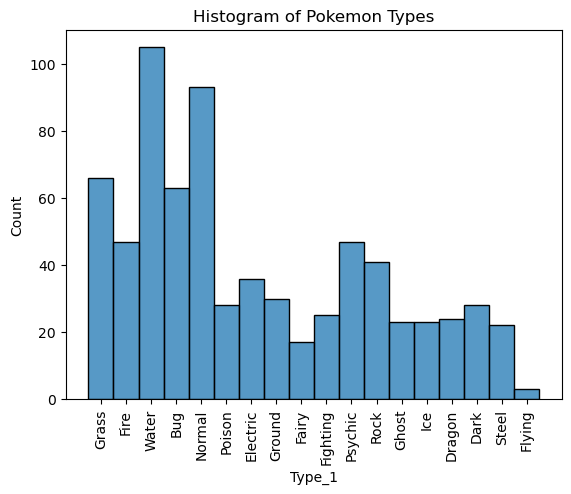

In [149]:
# creating a histogram of pokemon types
sns.histplot(df['Type_1'])
plt.xticks(rotation=90)
plt.title('Histogram of Pokemon Types')
plt.show()

### Scatterplot

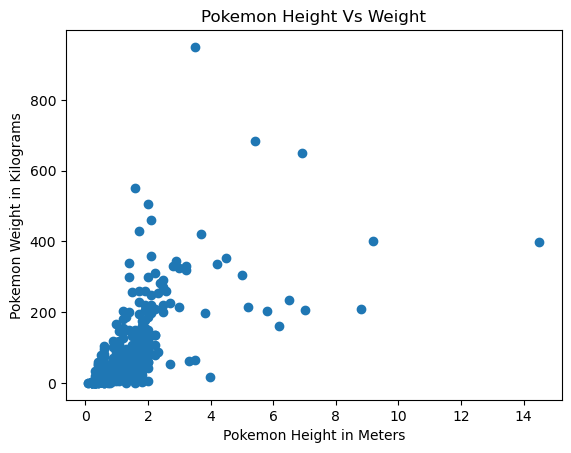

In [150]:
# creating a scatterplot of pokemon heights vs weight
plt.scatter(df['Height_m'],df['Weight_kg'])
plt.xlabel('Pokemon Height in Meters')
plt.ylabel('Pokemon Weight in Kilograms')
plt.title('Pokemon Height Vs Weight')
plt.show()

### Density Plot

C:\Users\rbrio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

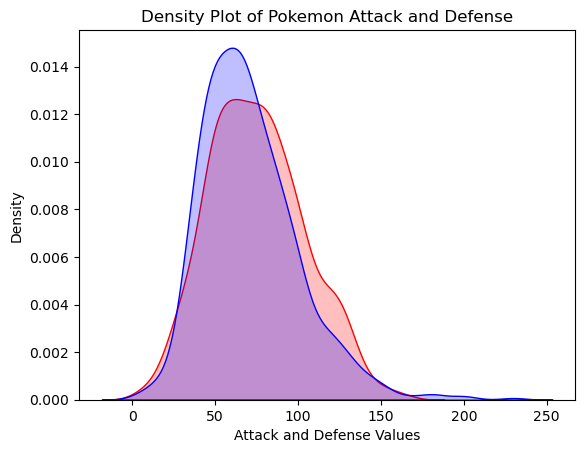

In [151]:
# plotting the denrsity of the 'Attack' column
x = df['Attack']
y = df['Defense']
sns.kdeplot(x, color="red", fill=True)
sns.kdeplot(y, color="blue", fill=True)
plt.xlabel('Attack and Defense Values')
plt.title('Density Plot of Pokemon Attack and Defense')
plt.show